<a href="https://colab.research.google.com/github/geo-tp/Keras-Colaboratory-Models/blob/main/mnist_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST with Machine Learning

## Import

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from tqdm import tqdm
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, \
                             BaggingClassifier, AdaBoostClassifier,  \
                             StackingClassifier, GradientBoostingClassifier
from keras.datasets import mnist

## Dataset

In [3]:
## MNIST, 60K train img of hand writted numbers, 10K test img

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# We reduce dataset to avoid too much calculation time
x_train = train_images[:10000].reshape(10000, 784)
y_train = train_labels[:10000]

x_test = test_images.reshape(10000, 784)
y_test = test_labels

11490434/11490434 [==============================] - 0s 0us/step


## K-Nearest Neighbors

100%|██████████| 8/8 [01:08<00:00,  8.51s/it]


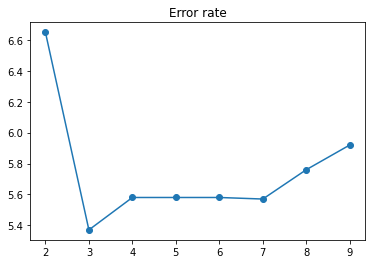

In [8]:
# Determinate best model with neighbors range from 2 to 9 and show error results

errors = []
for n_neighbors in tqdm(range(2,10)):
    knn = KNeighborsClassifier(n_neighbors)
    score = 1 - knn.fit(x_train, y_train).score(x_test, y_test)
    errors.append(score * 100)

plt.plot(range(2,10), errors, 'o-')
plt.title("Error rate")
plt.show()

In [4]:
# This model should predict the class of a given img, 3 neighbors is the most effective

knn_model = KNeighborsClassifier(n_neighbors=3)

# Train the effective model

knn_model.fit(x_train, y_train)

# Results

acc = knn_model.score(x_test, y_test)
print("Average accuracy for KNN : ", acc*100, "%")

Average accuracy for KNN :  94.63000000000001 %


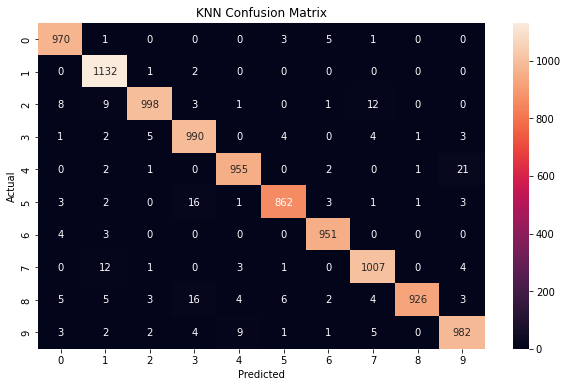

In [5]:
# Prediction

preds = knn_model.predict(x_test)

# Confusion Matrix

cm = confusion_matrix(y_test, preds)
plt.subplots(figsize=(10, 6))
sb.heatmap(cm, annot = True, fmt = 'g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("KNN Confusion Matrix")
plt.show()

## Stochastic Gradient Descent

In [10]:
# This model should predict the class of a given img

sgd_model = SGDClassifier(random_state=0)

# Training

sgd_model.fit(x_train, y_train)

#Results

acc = sgd_model.score(x_test, y_test)
print("Average accuracy for SGD : ", acc*100, "%")

Average accuracy for SGD :  86.35000000000001 %


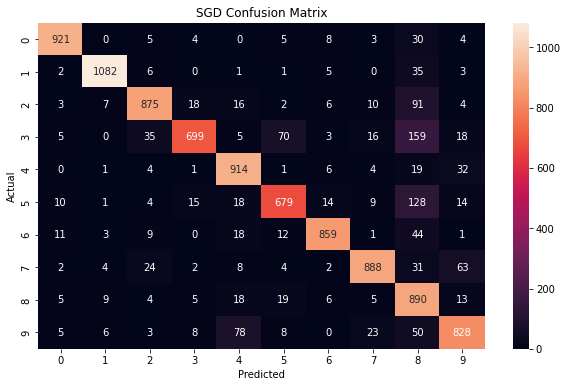

In [11]:
# Prediction

preds = sgd_model.predict(x_test)

# Confusion Matrix

cm = confusion_matrix(y_test, preds)
plt.subplots(figsize=(10, 6))
sb.heatmap(cm, annot = True, fmt = 'g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SGD Confusion Matrix")
plt.show()

## Decision Tree

In [12]:
# This model should predict the class of a given img

tree_model = DecisionTreeClassifier(random_state=0)

# Training

tree_model.fit(x_train, y_train)

#Results

acc = tree_model.score(x_test, y_test)
print("Average accuracy for Tree : ", acc*100, "%")

Average accuracy for Tree :  80.81 %


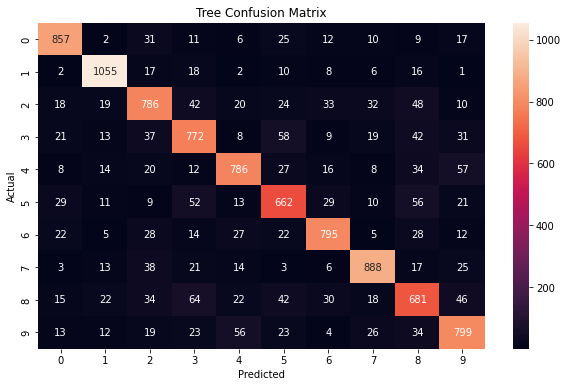

In [9]:
# Prediction

preds = tree_model.predict(x_test)

# Confusion Matrix

cm = confusion_matrix(y_test, preds)
plt.subplots(figsize=(10, 6))
sb.heatmap(cm, annot = True, fmt = 'g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Tree Confusion Matrix")
plt.show()

## Support Vector Machine

In [10]:
# This model should predict the class of a given img

svm_model = svm.LinearSVC(dual=False, max_iter=1500)

# Training

svm_model.fit(x_train, y_train)

#Results

acc = svm_model.score(x_test, y_test)
print("Average accuracy for SVM : ", acc*100, "%")

Average accuracy for SVM :  86.21 %


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


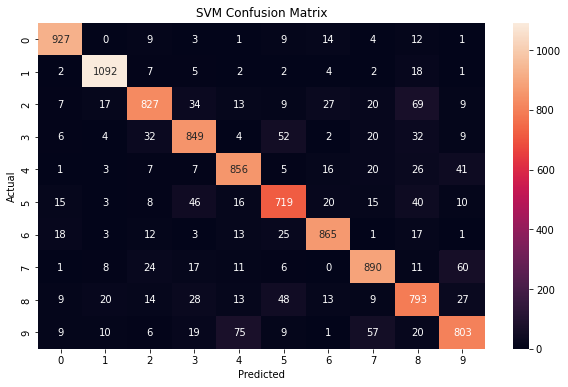

In [11]:
# Prediction

preds = svm_model.predict(x_test)

# Confusion Matrix

cm = confusion_matrix(y_test, preds)
plt.subplots(figsize=(10, 6))
sb.heatmap(cm, annot = True, fmt = 'g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM Confusion Matrix")
plt.show()

## Ensemble - Random Forest

In [12]:
# This model should predict the class of a given img

rf_model = RandomForestClassifier(n_estimators=100, max_depth=100)

# Training

rf_model.fit(x_train, y_train)

# Results

acc = rf_model.score(x_test, y_test)
print("Average accuracy for Random Forest : ", acc*100, "%")

Average accuracy for Random Forest :  94.88 %


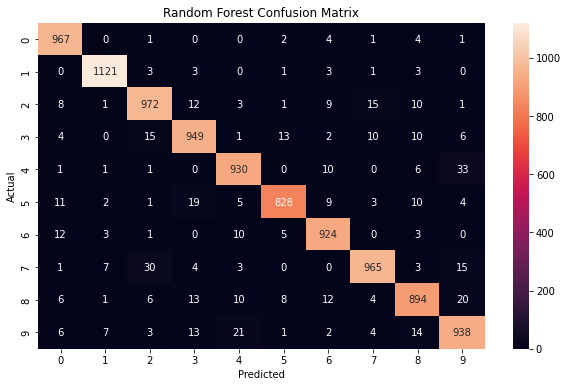

In [13]:
# Prediction

preds = rf_model.predict(x_test)

# Confusion Matrix

cm = confusion_matrix(y_test, preds)
plt.subplots(figsize=(10, 6))
sb.heatmap(cm, annot = True, fmt = 'g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()

## Ensemble - Voting

In [13]:
# This model should predict the class of a given img

voting_model = VotingClassifier([("SGD", sgd_model), 
                                 ("Tree", tree_model), 
                                 ("KNN", knn_model)],
                              voting='hard')

# Training

voting_model.fit(x_train, y_train)

#Results

acc = voting_model.score(x_test, y_test)
print("Average accuracy for Voting : ", acc*100, "%")

Average accuracy for Voting :  92.75 %


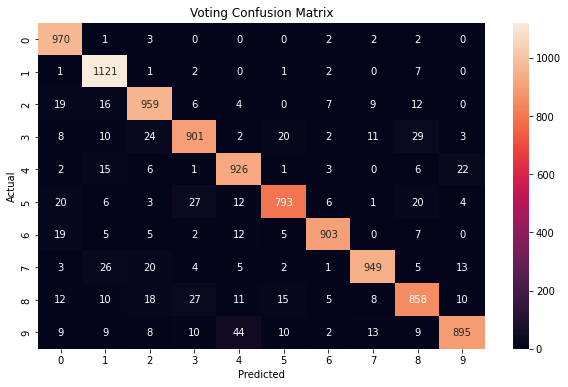

In [15]:
# Prediction

preds = voting_model.predict(x_test)

# Confusion Matrix

cm = confusion_matrix(y_test, preds)
plt.subplots(figsize=(10, 6))
sb.heatmap(cm, annot = True, fmt = 'g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Voting Confusion Matrix")
plt.show()

## Ensemble - Bagging

In [16]:
# This model should predict the class of a given img

bagging_model = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),
                                  n_estimators=10)

# Training

bagging_model.fit(x_train, y_train)

#Results

acc = bagging_model.score(x_test, y_test)
print("Average accuracy for Bagging : ", acc*100, "%")

Average accuracy for Bagging :  94.69999999999999 %


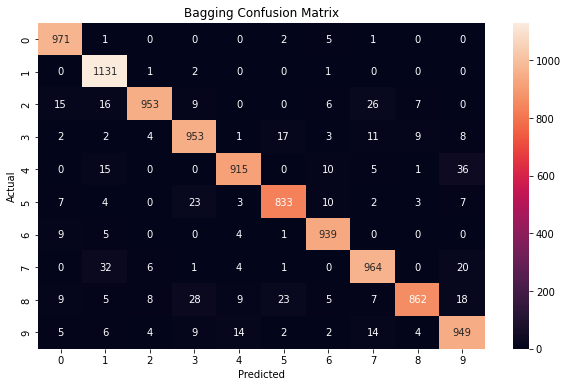

In [17]:
# Prediction

preds = bagging_model.predict(x_test)

# Confusion Matrix

cm = confusion_matrix(y_test, preds)
plt.subplots(figsize=(10, 6))
sb.heatmap(cm, annot = True, fmt = 'g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Bagging Confusion Matrix")
plt.show()

## Ensemble - Boosting

In [18]:
# This model should predict the class of a given img

boosting_model = AdaBoostClassifier(n_estimators=100)

# Training

boosting_model.fit(x_train, y_train)

#Results

acc = boosting_model.score(x_test, y_test)
print("Average accuracy for Boosting : ", acc*100, "%")

Average accuracy for Boosting :  58.84 %


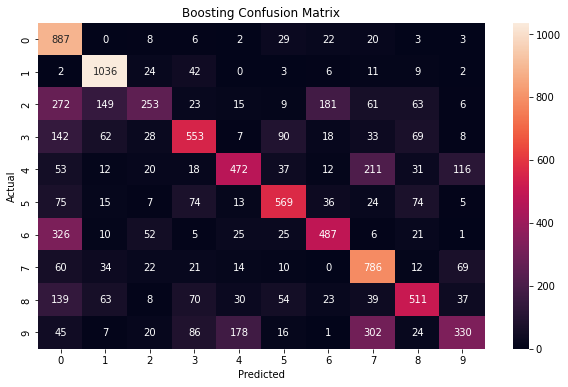

In [19]:
# Prediction

preds = boosting_model.predict(x_test)

# Confusion Matrix

cm = confusion_matrix(y_test, preds)
plt.subplots(figsize=(10, 6))
sb.heatmap(cm, annot = True, fmt = 'g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Boosting Confusion Matrix")
plt.show()

## Ensemble - Stacking

In [20]:
# This model should predict the class of a given img

stacking_model = StackingClassifier([("SGD", knn_model), ("Tree", tree_model)],
                                 final_estimator=KNeighborsClassifier(n_neighbors=3))

# Training

stacking_model.fit(x_train, y_train)

#Results

acc = stacking_model.score(x_test, y_test)
print("Average accuracy for Stacking : ", acc*100, "%")

Average accuracy for Stacking :  93.96 %


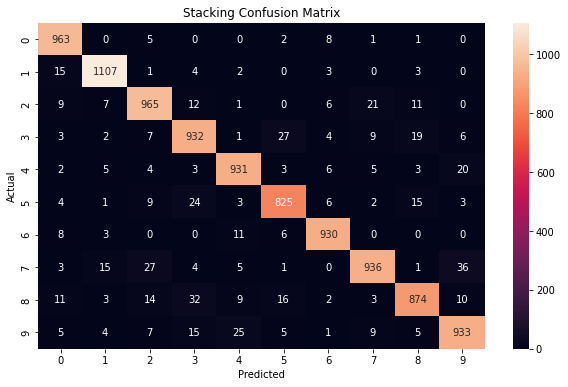

In [21]:
# Prediction

preds = stacking_model.predict(x_test)

# Confusion Matrix

cm = confusion_matrix(y_test, preds)
plt.subplots(figsize=(10, 6))
sb.heatmap(cm, annot = True, fmt = 'g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Stacking Confusion Matrix")
plt.show()